In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import yfinance as yf 


In [3]:
tesla_data = yf.Ticker("TSLA")


In [4]:
tesla_data = tesla_data.history(period="max")

In [5]:
df = pd.DataFrame(tesla_data)
df = df.loc["2022-01-01":].copy()

In [6]:
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,382.583344,400.356659,378.679993,399.926666,103931400,0.0,0.0
2022-01-04 00:00:00-05:00,396.516663,402.666656,374.350006,383.196655,100248300,0.0,0.0
2022-01-05 00:00:00-05:00,382.216675,390.113342,360.336670,362.706665,80119800,0.0,0.0
2022-01-06 00:00:00-05:00,359.000000,362.666656,340.166656,354.899994,90336600,0.0,0.0
2022-01-07 00:00:00-05:00,360.123322,360.309998,336.666656,342.320007,84164700,0.0,0.0
2022-01-10 00:00:00-05:00,333.333344,353.033325,326.666656,352.706665,91815000,0.0,0.0
2022-01-11 00:00:00-05:00,351.223328,358.616669,346.273346,354.799988,66063300,0.0,0.0
2022-01-12 00:00:00-05:00,359.616669,371.613342,357.529999,368.739990,83739000,0.0,0.0
2022-01-13 00:00:00-05:00,369.690002,371.866669,342.179993,343.853333,97209900,0.0,0.0


In [7]:
del df["Dividends"]
del df["Stock Splits"]

In [8]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2023-11-14 00:00:00-05:00,235.029999,238.139999,230.720001,237.410004,149771600
2023-11-15 00:00:00-05:00,239.289993,246.699997,236.449997,242.839996,150354000
2023-11-16 00:00:00-05:00,239.490005,240.880005,230.960007,233.589996,136816800
2023-11-17 00:00:00-05:00,232.000000,237.389999,226.539993,234.300003,142532800
2023-11-20 00:00:00-05:00,234.039993,237.100006,231.020004,235.600006,116320100
2023-11-21 00:00:00-05:00,235.039993,243.619995,233.339996,241.199997,122288000
2023-11-22 00:00:00-05:00,242.039993,244.009995,231.399994,234.210007,117950600
2023-11-24 00:00:00-05:00,233.750000,238.750000,232.330002,235.449997,65125200
2023-11-27 00:00:00-05:00,236.889999,238.330002,232.100006,236.080002,112031800


In [9]:
df.index

DatetimeIndex(['2022-01-03 00:00:00-05:00', '2022-01-04 00:00:00-05:00',
               '2022-01-05 00:00:00-05:00', '2022-01-06 00:00:00-05:00',
               '2022-01-07 00:00:00-05:00', '2022-01-10 00:00:00-05:00',
               '2022-01-11 00:00:00-05:00', '2022-01-12 00:00:00-05:00',
               '2022-01-13 00:00:00-05:00', '2022-01-14 00:00:00-05:00',
               ...
               '2023-11-14 00:00:00-05:00', '2023-11-15 00:00:00-05:00',
               '2023-11-16 00:00:00-05:00', '2023-11-17 00:00:00-05:00',
               '2023-11-20 00:00:00-05:00', '2023-11-21 00:00:00-05:00',
               '2023-11-22 00:00:00-05:00', '2023-11-24 00:00:00-05:00',
               '2023-11-27 00:00:00-05:00', '2023-11-28 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=479, freq=None)

<Axes: xlabel='Date'>

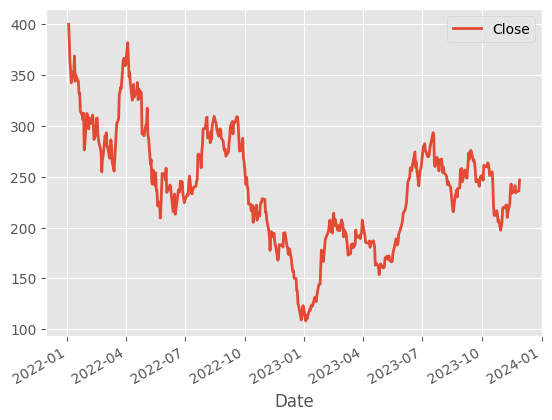

In [10]:
df.plot.line(y="Close", use_index=True, lw=2)

In [11]:
def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

def DEMA(data, EMA):
    return 2*EMA - EMA(EMA)

In [12]:
#MACD - moving average convergence divergence

def MACD(data, long_period=26, short_period=12, signal_line_period=9, column='Close'):
    short_EMA = EMA(data, short_period, column=column)
    long_EMA = EMA(data, long_period, column=column)

    data['MACD'] = short_EMA - long_EMA
    data['Signal Line'] = EMA(data, signal_line_period, column='MACD')

    return tesla_data

In [13]:
#RSI - Relative Strength Index

def RSI(data, period=14, column='Close'):
    delta = data[column].diff(1)
    delta = delta[1:]
    
    increasing = delta.copy()
    decreasing = delta.copy()
    increasing[increasing < 0] = 0
    decreasing[decreasing > 0] = 0

    data['Increasing'] = increasing
    data['Decreasing'] = decreasing

    average_gain = SMA(data, period, column='Increasing')
    average_loss = abs(SMA(data, period, column='Decreasing'))

    relative_strength = average_gain / average_loss
    RSI = 100 - (100/(1 + relative_strength))

    data['RSI'] = RSI

    return data



In [14]:
MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)



In [15]:
df

,Open,High,Low,Close,Volume,MACD,Signal Line,Increasing,Decreasing,RSI,SMA,EMA
Date,,,,,,,,,,,,
2022-01-03 00:00:00-05:00,382.583344,400.356659,378.679993,399.926666,103931400,0.000000,0.000000,NaN,NaN,NaN,NaN,399.926666
2022-01-04 00:00:00-05:00,396.516663,402.666656,374.350006,383.196655,100248300,-1.334588,-0.266918,0.000000,-16.730011,NaN,NaN,398.333332
2022-01-05 00:00:00-05:00,382.216675,390.113342,360.336670,362.706665,80119800,-3.999525,-1.013439,0.000000,-20.489990,NaN,NaN,394.940316
2022-01-06 00:00:00-05:00,359.000000,362.666656,340.166656,354.899994,90336600,-6.664615,-2.143674,0.000000,-7.806671,NaN,NaN,391.126952
2022-01-07 00:00:00-05:00,360.123322,360.309998,336.666656,342.320007,84164700,-9.680230,-3.650985,0.000000,-12.579987,NaN,NaN,386.478672
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21 00:00:00-05:00,235.039993,243.619995,233.339996,241.199997,122288000,0.993622,-2.885959,5.599991,0.000000,72.262589,226.325999,228.684088
2023-11-22 00:00:00-05:00,242.039993,244.009995,231.399994,234.210007,117950600,1.231657,-2.062436,0.000000,-6.989990,60.613855,225.366667,229.210366
2023-11-24 00:00:00-05:00,233.750000,238.750000,232.330002,235.449997,65125200,1.503032,-1.349342,1.239990,0.000000,60.501693,224.586000,229.804617


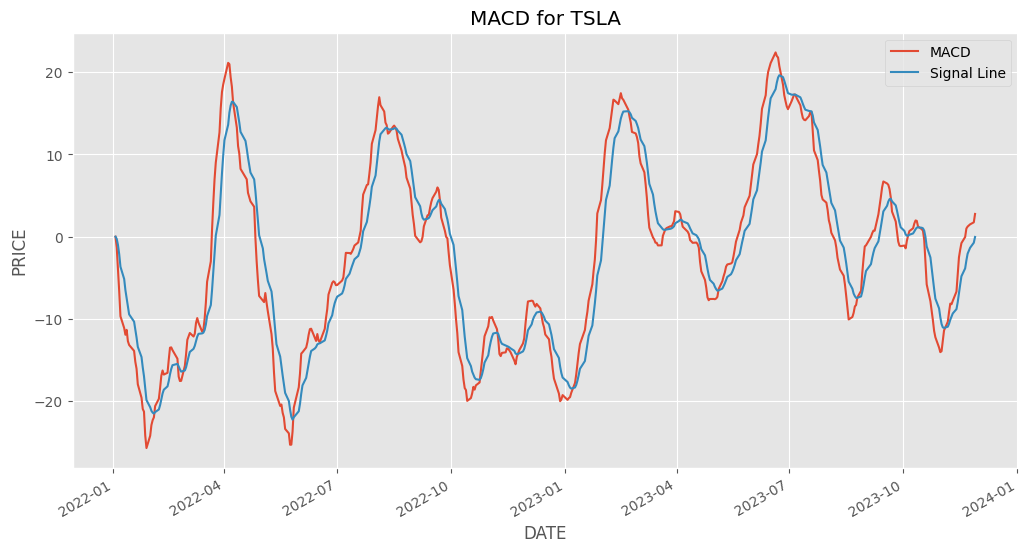

In [16]:
col_list = ['MACD', 'Signal Line']
df[col_list].plot(figsize=(12.2,6.4))
plt.title('MACD for TSLA')
plt.ylabel('PRICE')
plt.xlabel('DATE')
plt.show()

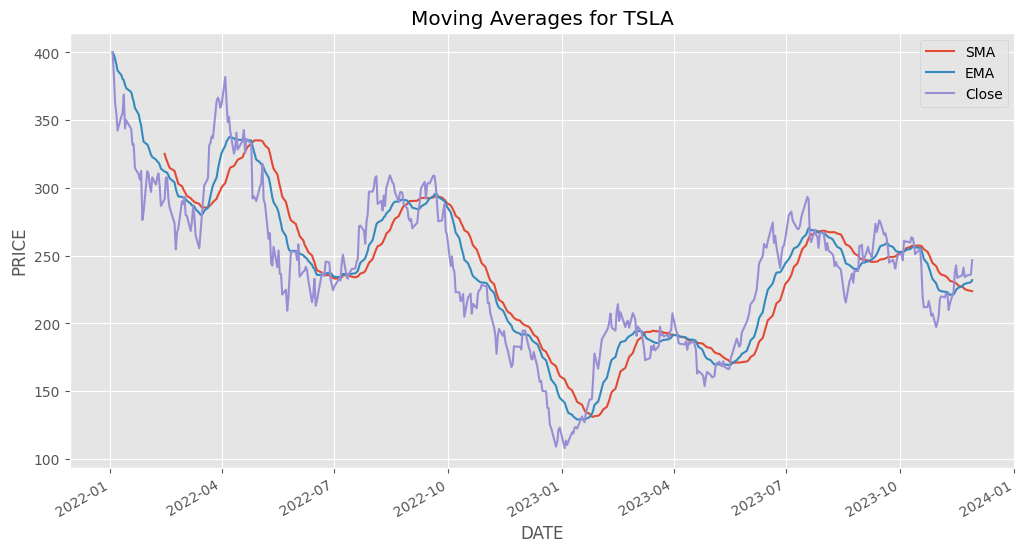

In [17]:
col_list = ['SMA', 'EMA', 'Close']
df[col_list].plot(figsize=(12.2,6.4))
plt.title('Moving Averages for TSLA')
plt.ylabel('PRICE')
plt.xlabel('DATE')
plt.show()

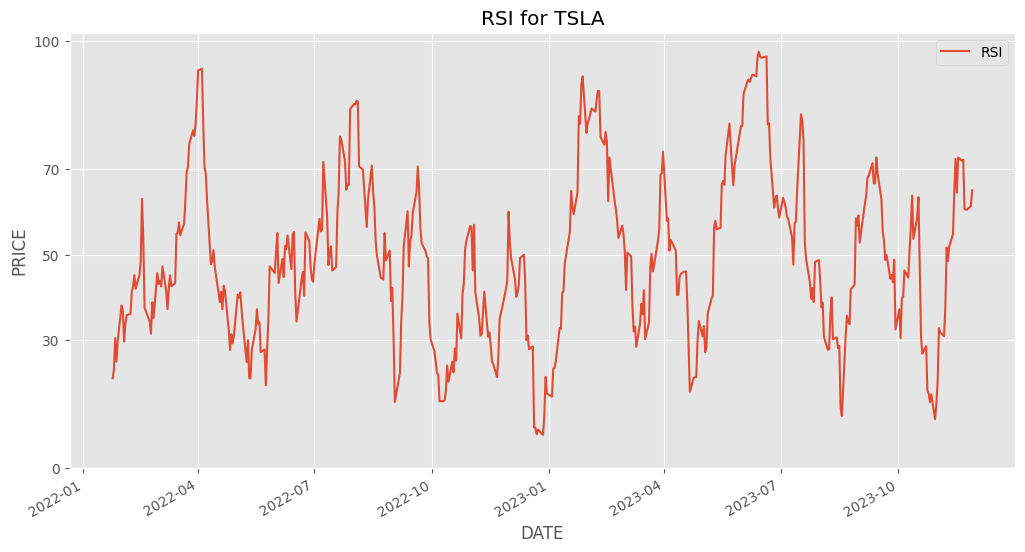

In [18]:
col_list = ['RSI']
df[col_list].plot(figsize=(12.2,6.4))
plt.title('RSI for TSLA')
plt.ylabel('PRICE')
plt.yticks([0,30,50,70,100])
plt.xlabel('DATE')
plt.show()